Importing libraries and setting up aliases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Creating a custom logistic regression class with methods for model fitting and prediction,using gradient descent to optimize weights and bias for binary classification

In [2]:
class Logistic_Regression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def __str__(self):
        return f"Logistic_Regression"

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def cfit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            # Linear combination of features and weights
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply the sigmoid function to get probabilities
            y_pred = self.sigmoid(linear_model)

            # Calculate the gradient
            dw = (1 / len(y)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(y)) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def cpredict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_model)
        predictions = np.round(probabilities)
        return predictions

Load CSV file

Reading a CSV file

In [3]:
df = pd.read_csv( "/content/Employee.csv" )
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


Describing the columns in a dataset

#**Description of Columns**

Education-->Educational qualification of employees

JoiningYear-->Year the employee joined in the company

City-->City the employee lives

PaymentTier-->Category of payment tier the employee belongs to

Age-->Age of the employee

Gender-->Gender identity of the employee

EverBenched-->Whether an employee has ever been temporarily without assigned work

ExperienceInCurrentDomain-->Number of years of experience employees have in their current field

LeaveOrNot-->Whether the employee will leave the company or not

Columns and their data types

Providing summary of the dataset including data types, non-null counts, and memory usage

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Generating a list of unique values for each column in the dataset

In [5]:
print("\n\nUnique Values:\n")
[f"{col}: {df[col].unique()}" for col in df.columns]



Unique Values:



["Education: ['Bachelors' 'Masters' 'PHD']",
 'JoiningYear: [2017 2013 2014 2016 2015 2012 2018]',
 "City: ['Bangalore' 'Pune' 'New Delhi']",
 'PaymentTier: [3 1 2]',
 'Age: [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]',
 "Gender: ['Male' 'Female']",
 "EverBenched: ['No' 'Yes']",
 'ExperienceInCurrentDomain: [0 3 2 5 1 4 7 6]',
 'LeaveOrNot: [0 1]']

Removing duplicate rows from the dataset

In [6]:
print(f'\n\nTotal duplicate rows: {df.duplicated().sum()}')
df= df.drop_duplicates()



Total duplicate rows: 1889


<Axes: >

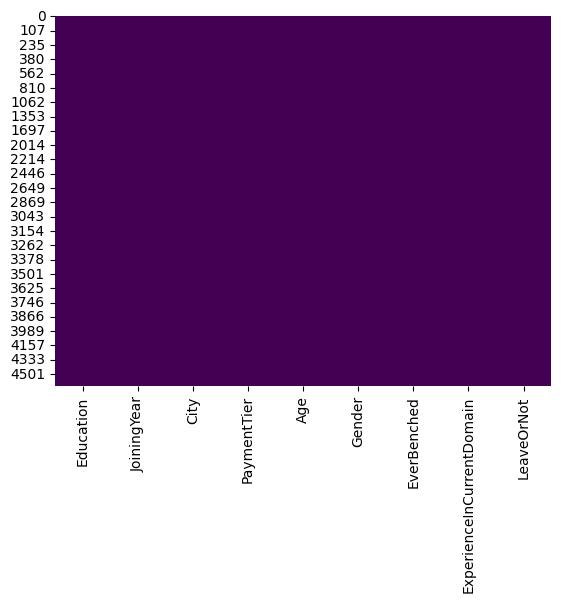

In [7]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

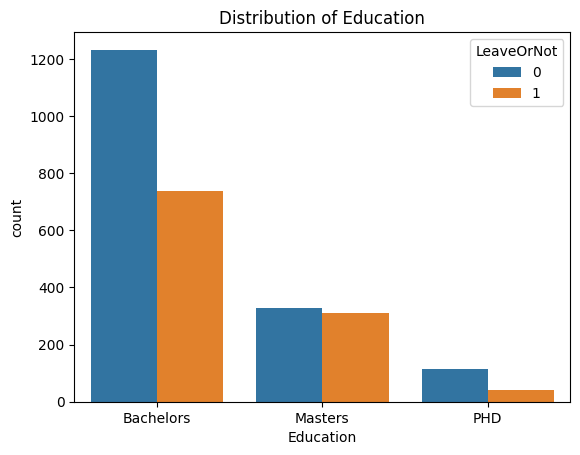

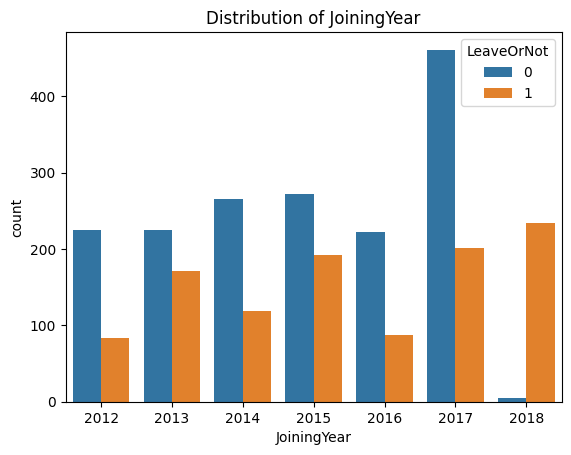

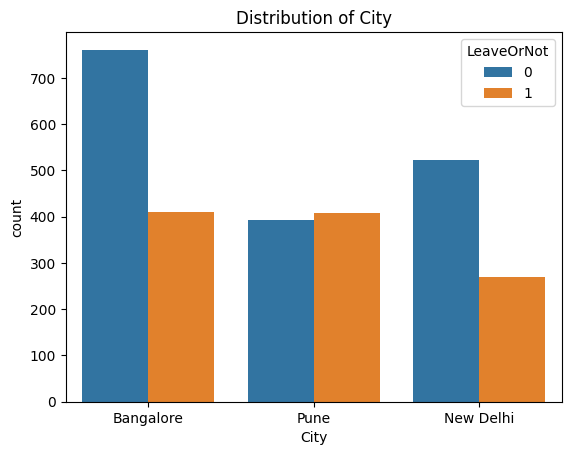

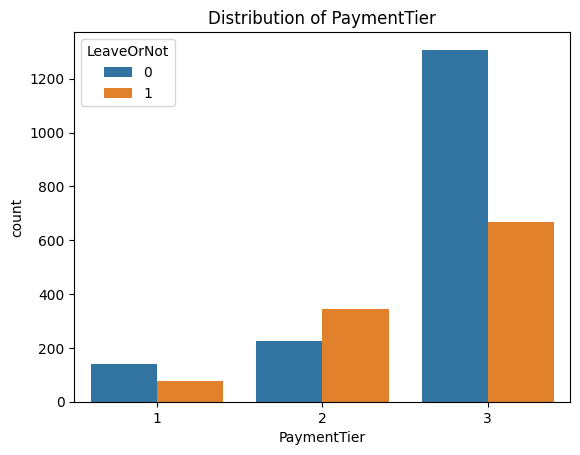

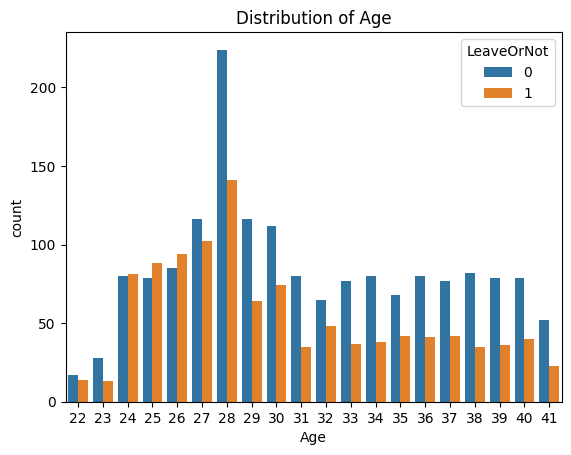

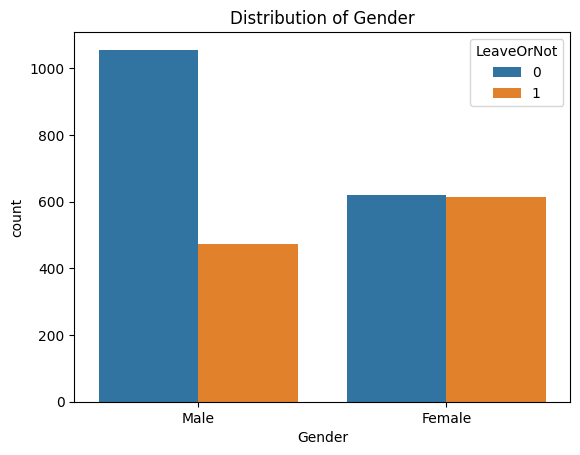

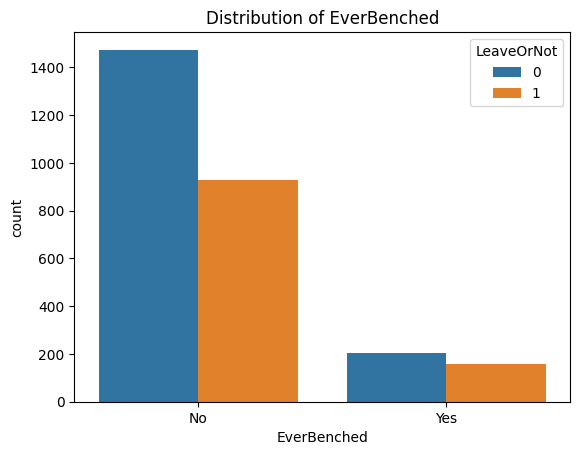

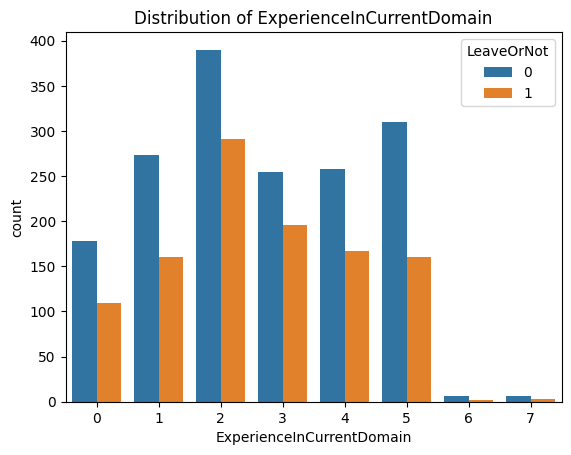

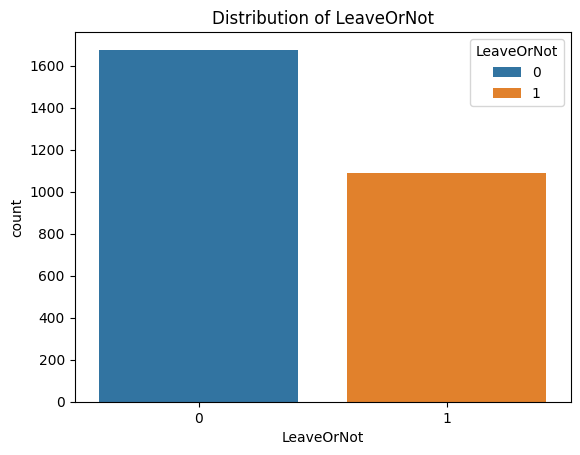

In [8]:
for col in df.columns:
    sns.countplot(x=col,hue='LeaveOrNot', data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

Inference:
->Mostly Employees stays upto 5 years of experience

->If employee has highest payment tier, then they mostly not prefer to leave

->It has a imbalanced class(LeaveOrNot) 1700 as no and 1100 as yes, I used smote oversampling technique to balance the class

Defining a custom encoder class which fits and transforms categorical columns in a dataset

In [9]:
cols=['Education','City','Gender','EverBenched']
mm = MinMaxScaler()
mappin = dict()
for variable in cols:
    mappings = {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}
    mappin[variable] = mappings

for variable in cols:
    df[variable] = df[variable].map(mappin[variable])

for i in cols:
        df[i] = round(df[i]).astype('int')
df  = df.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df

<ipython-input-9-c5ec8ff187b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable] = df[variable].map(mappin[variable])
<ipython-input-9-c5ec8ff187b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable] = df[variable].map(mappin[variable])
<ipython-input-9-c5ec8ff187b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,0.833333,0.0,1.0,0.631579,0.0,0.0,0.000000,0.0
1,0.0,0.166667,0.5,0.0,0.315789,1.0,0.0,0.428571,1.0
2,0.0,0.333333,1.0,1.0,0.842105,1.0,0.0,0.285714,0.0
3,0.5,0.666667,0.0,1.0,0.263158,0.0,0.0,0.714286,1.0
4,0.5,0.833333,0.5,1.0,0.105263,0.0,1.0,0.285714,1.0
...,...,...,...,...,...,...,...,...,...
4645,0.5,0.833333,0.5,0.5,0.473684,1.0,0.0,0.285714,0.0
4647,0.0,0.666667,0.5,1.0,0.421053,0.0,0.0,0.285714,0.0
4649,0.5,0.166667,0.5,0.5,0.789474,0.0,0.0,0.285714,1.0
4650,0.5,1.000000,1.0,1.0,0.263158,0.0,0.0,0.714286,1.0


Generating a transposed summary statistics table for the dataset including count, mean, standard deviation, minimum, and maximum values for numerical columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2764.0,0.171671,0.290887,0.0,0.000000,0.000000,0.500000,1.0
JoiningYear,2764.0,0.515075,0.314324,0.0,0.166667,0.500000,0.833333,1.0
City,2764.0,0.431440,0.415828,0.0,0.000000,0.500000,1.000000,1.0
PaymentTier,2764.0,0.818017,0.312001,0.0,0.500000,1.000000,1.000000,1.0
Age,2764.0,0.471209,0.268888,0.0,0.263158,0.421053,0.684211,1.0
Gender,2764.0,0.446816,0.497253,0.0,0.000000,0.000000,1.000000,1.0
EverBenched,2764.0,0.130608,0.337032,0.0,0.000000,0.000000,0.000000,1.0
ExperienceInCurrentDomain,2764.0,0.377765,0.230087,0.0,0.142857,0.285714,0.571429,1.0
LeaveOrNot,2764.0,0.393632,0.488643,0.0,0.000000,0.000000,1.000000,1.0


Generating a heatmap visualization of the correlation matrix

<Axes: >

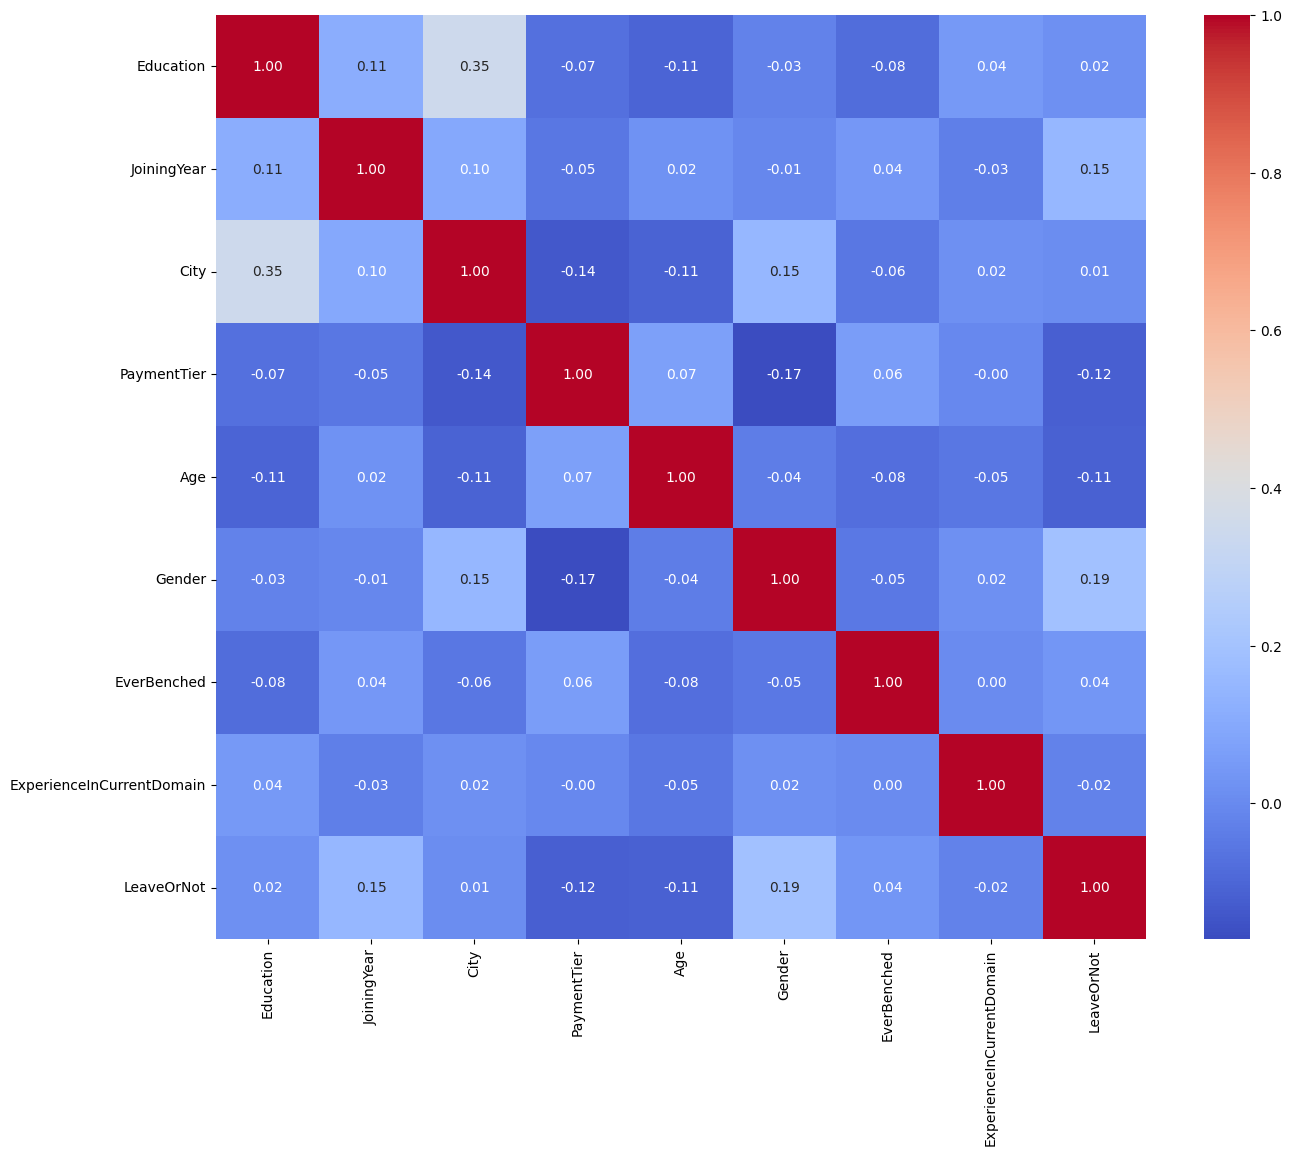

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Inference:

'Education','City','EverBenched','ExperienceInCurrentDomain' are less correlated to leaveOrNot

Generating a pairplot for the dataset with the hue as 'LeaveOrNot'

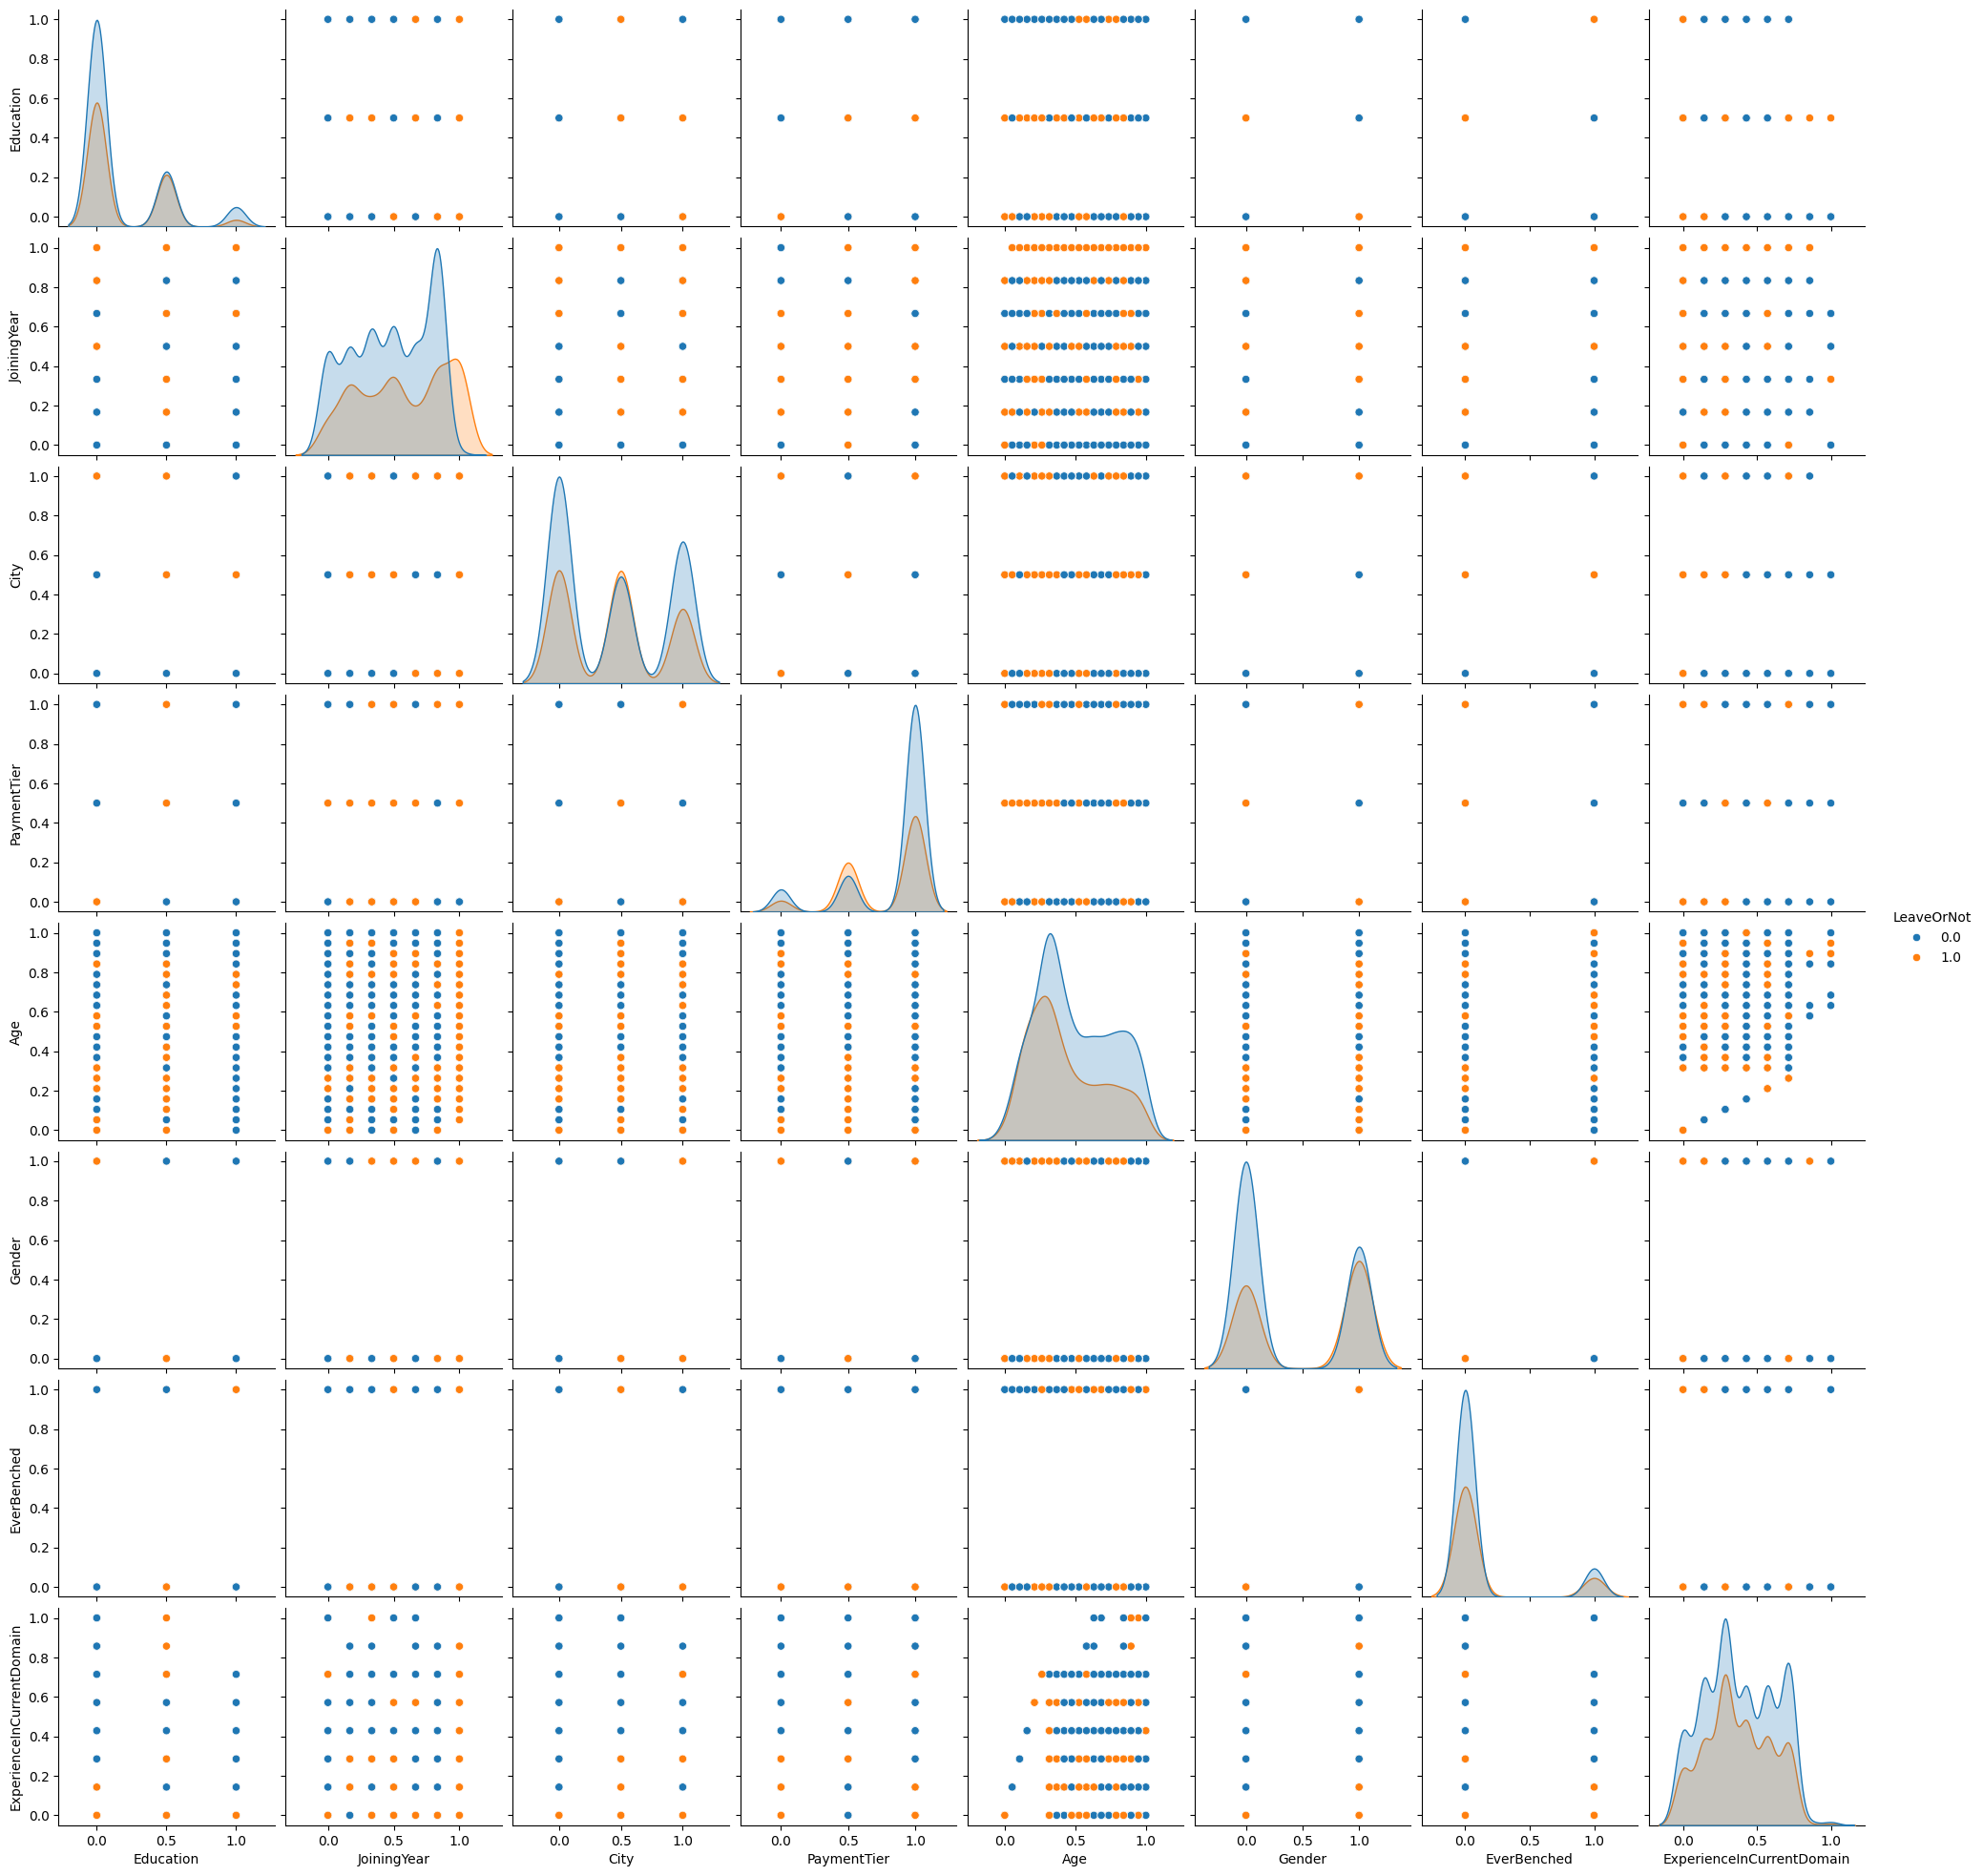

In [12]:
sns.pairplot(df,hue='LeaveOrNot',diag_kind='kde')

Inference:

->EverBenced column is left skewed

->Male under 2 year experience not leave company even they has low payment

->High aged people has high experience in current domain

Creating input feature and target variable arrays for the prediction

In [13]:
X = df.drop(['Education','City','EverBenched','ExperienceInCurrentDomain','LeaveOrNot'],axis=1)
Y = df['LeaveOrNot']
X,Y

(      JoiningYear  PaymentTier       Age  Gender
 0        0.833333          1.0  0.631579     0.0
 1        0.166667          0.0  0.315789     1.0
 2        0.333333          1.0  0.842105     1.0
 3        0.666667          1.0  0.263158     0.0
 4        0.833333          1.0  0.105263     0.0
 ...           ...          ...       ...     ...
 4645     0.833333          0.5  0.473684     1.0
 4647     0.666667          1.0  0.421053     0.0
 4649     0.166667          0.5  0.789474     0.0
 4650     1.000000          1.0  0.263158     0.0
 4651     0.000000          1.0  0.421053     0.0
 
 [2764 rows x 4 columns],
 0       0.0
 1       1.0
 2       0.0
 3       1.0
 4       1.0
        ... 
 4645    0.0
 4647    0.0
 4649    1.0
 4650    1.0
 4651    0.0
 Name: LeaveOrNot, Length: 2764, dtype: float64)

Splitting the target and feature variables as test and train sets

In [14]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [15]:
# Splitting dataset into train and test set

def custom_train_test_split(X, Y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)

    num_test_samples = int(test_size * num_samples)

    test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False)

    mask_train = np.ones(num_samples, dtype=bool)
    mask_train[test_indices] = False
    X_train, X_test = X[mask_train], X[~mask_train]
    Y_train, Y_test = Y[mask_train], Y[~mask_train]

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = custom_train_test_split(X, Y, test_size=0.3, random_state=42)

Implementing sklearn's logistic regression model

In [16]:
model = LogisticRegression()
model.fit(X_train,Y_train)
# Prediction on test set
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 64.38%
Confusion Matrix:
[[318 176]
 [182 329]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64       494
         1.0       0.65      0.64      0.65       511

    accuracy                           0.64      1005
   macro avg       0.64      0.64      0.64      1005
weighted avg       0.64      0.64      0.64      1005



Creating an instance of the LogisticRegression1 class and assigning it to a variable 'model1',
training the model using the scaled training data and generating predictions using the trained model

In [18]:
# Model training
cmodel =Logistic_Regression()
cmodel.cfit(X_train,Y_train)
custom_y_pred = cmodel.cpredict( X_test )

Printing the accuracy scores and classification reports for both a custom model and a scikit-learn model


Accuracy: 59.60%
Confusion Matrix:


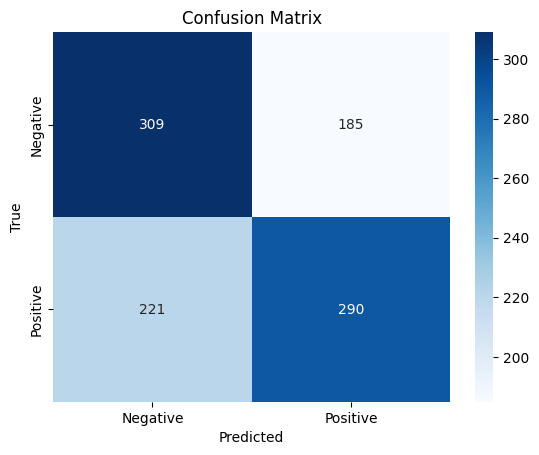

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.63      0.60       494
         1.0       0.61      0.57      0.59       511

    accuracy                           0.60      1005
   macro avg       0.60      0.60      0.60      1005
weighted avg       0.60      0.60      0.60      1005



In [19]:
accuracy = accuracy_score(Y_test,custom_y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
cm=confusion_matrix(Y_test,custom_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(Y_test,custom_y_pred))

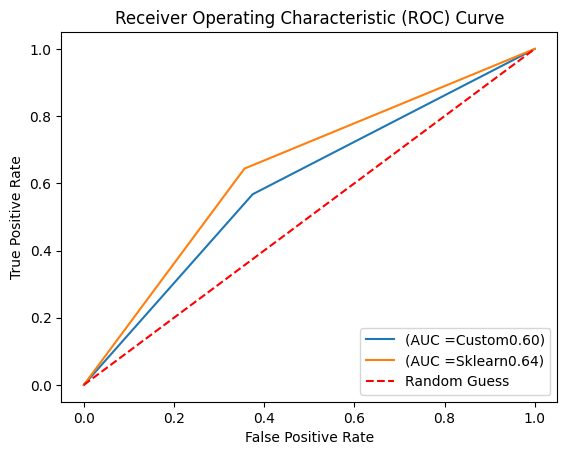

In [20]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc

models={'Custom':custom_y_pred,'Sklearn':y_pred}
for model_name, model_prob in models.items():
  fpr, tpr, thresholds = roc_curve(Y_test,model_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'(AUC ={model_name}{roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

custom and sklearn model has 0.62 as AUC score, we need to improve the model.